## Import Libraries

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Data

In [2]:
data = pd.read_csv("lung cancer survey.csv")

In [3]:
data.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO


## Missing Data?

In [4]:
data.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

## Data Splitting & Converting to Numerical

In [7]:
X = data.drop(['LUNG_CANCER'],axis = 1)
y = data['LUNG_CANCER']

In [9]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_cols:
    X[column] = label_encoder.fit_transform(X[column])

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Random Forest Model

In [11]:
clf = RandomForestClassifier(n_estimators=100,criterion='gini').fit(X_train,y_train)

## Accurcay

In [15]:
pred = clf.predict(X_test)
predt = clf.predict(X_train)

print(f'Train Accuracy: {accuracy_score(y_train,predt)*100:.2f}%')
print(f'Test Accuracy: {accuracy_score(y_test,pred)*100:.2f}%')

Train Accuracy: 99.54%
Test Accuracy: 96.77%


## Confusion Matrix

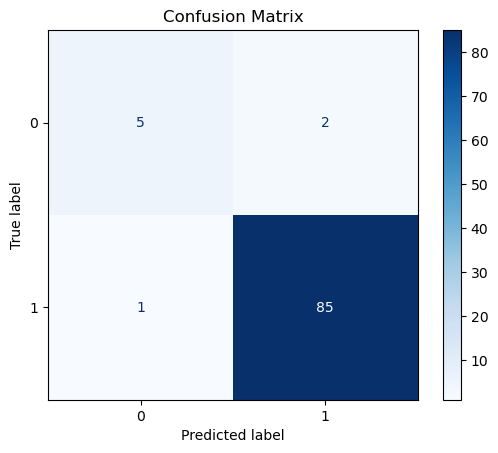

In [17]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Feature Importance

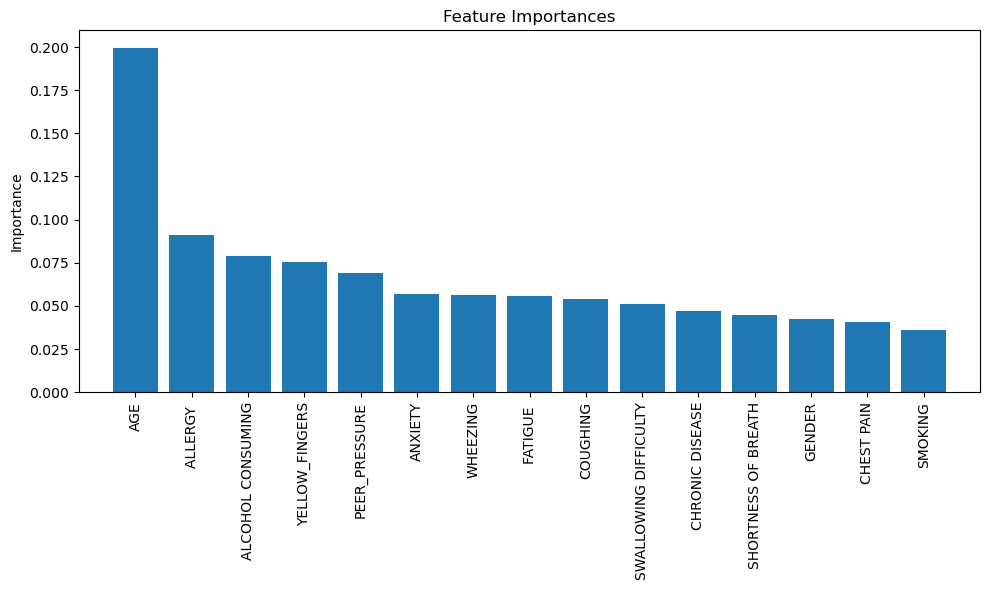

In [18]:
feature_importances = clf.feature_importances_
feature_names = clf.feature_names_in_

indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[indices], align='center')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(feature_importances)])
plt.ylabel("Importance")
plt.tight_layout()
plt.show()